# Linear Regression Project

### Predicting the cost of health insurance for a person

- The important insurance company 4Geeks Insurance S.L. wants to calculate, based on physiological data of its customers what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors and based on data from other companies and a particular study have managed to gather a set of data to train a predictive model.

In [2]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Dataset Shape Analysis

total_data.shape

(1338, 7)

In [4]:
# Dataset Info 

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Identify and Trim Duplicates

if total_data.duplicated().sum() > 0 :
    total_data.drop_duplicates()

In [6]:
# Separate in 2 lists the numerical and categorical variables

cat_variables = total_data.select_dtypes(include=['object']).columns.tolist()
num_variables = total_data.select_dtypes(include=['number']).columns.tolist()

print("Categorical variables:", cat_variables)
print("Numerical variables:", num_variables)

Categorical variables: ['sex', 'smoker', 'region']
Numerical variables: ['age', 'bmi', 'children', 'charges']


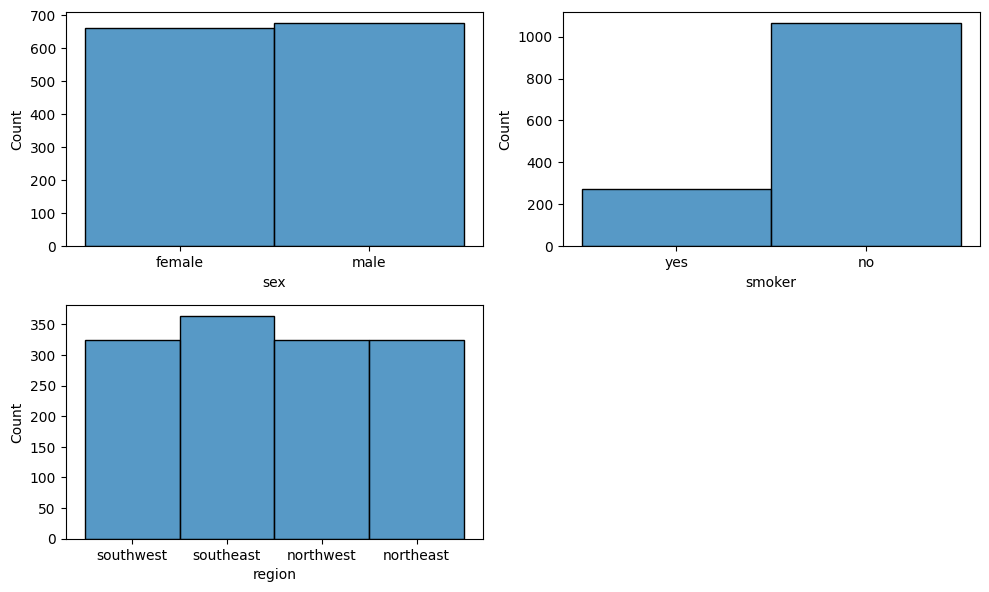

In [7]:
# Univariate Data Analysis

# Categorial Univariate Analysis: ['sex', 'smoker', 'region']

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2,2 , figsize = (10,6))

sns.histplot(ax = axes [0,0] , data = total_data , x = 'sex')
sns.histplot(ax = axes [0,1] , data = total_data , x = 'smoker')
sns.histplot(ax = axes [1,0] , data = total_data , x = 'region')
fig.delaxes(axes[1,1])

# Adjust Layout
plt.tight_layout()

# Plot the Data
plt.show()

Conclusions:

- The categories sex and region are quite homogeneous.
- There are much more people non-smokers compared to smokers.

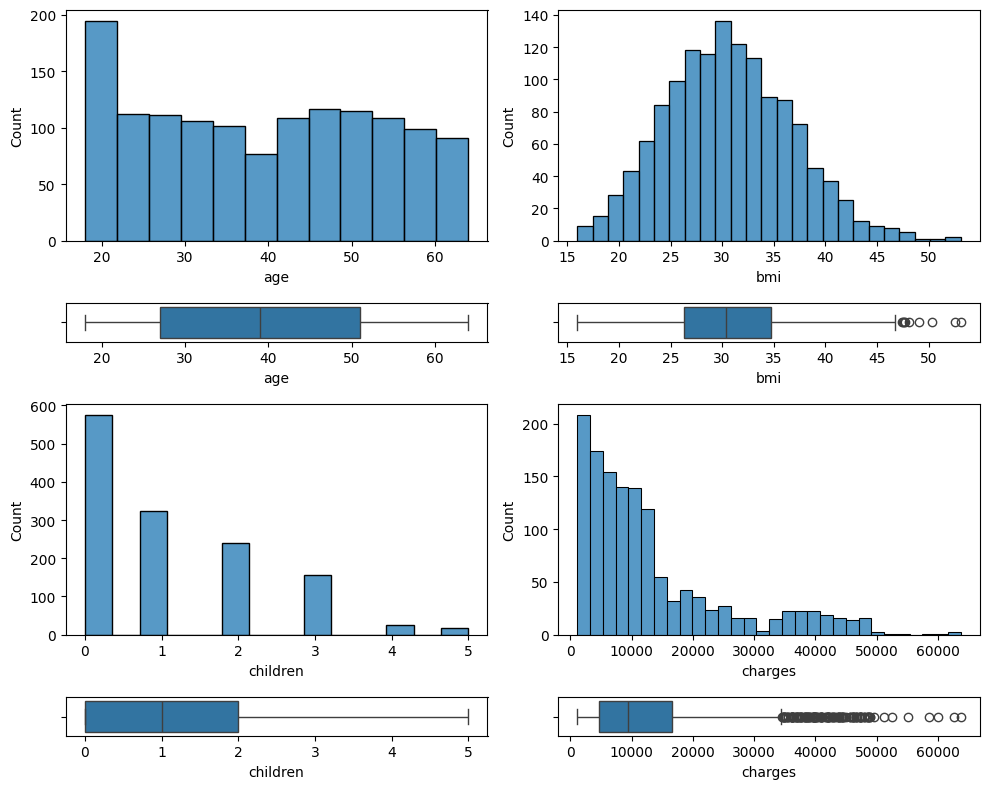

In [8]:
# Univariate Data Analysis

# Numerical Univariate Analysis: ['age', 'bmi', 'children', 'charges']

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4,2 , figsize = (10,8), gridspec_kw={'height_ratios' : [6, 1, 6, 1]})

sns.histplot(ax = axes [0,0] , data = total_data , x = 'age')
sns.boxplot(ax = axes [1,0] , data = total_data, x = 'age')
sns.histplot(ax = axes [0,1] , data = total_data , x = 'bmi')
sns.boxplot(ax = axes [1,1] , data = total_data, x = 'bmi')
sns.histplot(ax = axes [2,0] , data = total_data , x = 'children')
sns.boxplot(ax = axes [3,0] , data = total_data, x = 'children')
sns.histplot(ax = axes [2,1] , data = total_data , x = 'charges')
sns.boxplot(ax = axes [3,1] , data = total_data, x = 'charges')

# Adjust Layout
plt.tight_layout()

# Plot the Data
plt.show()

Conclusions:

- There are more twenty-year-old people and for the rest of ages the distribution is quite uniform.
- The BMI is very close to a normal distribution, except for some outliers.
- The distribution of charges is asymmetric and we need to analyse its outliers with atention. 

Let's take a look into the highest prices to see if they have any special common characteristics.

In [9]:
high_charges =  total_data[total_data['charges'] > 40000]
print(high_charges.shape)
high_charges

(79, 7)


,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
39,60,male,39.900,0,yes,southwest,48173.36100
55,58,male,36.955,2,yes,northwest,47496.49445
86,57,female,31.160,0,yes,northwest,43578.93940
94,64,female,31.300,2,yes,southwest,47291.05500
...,...,...,...,...,...,...,...
1241,64,male,36.960,2,yes,southeast,49577.66240
1284,61,male,36.300,1,yes,southwest,47403.88000
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325


In [10]:
average_bmi = total_data['bmi'].mean().round(3)
print('BMI average is:', average_bmi)

BMI average is: 30.663


In [11]:
smoker_outlier = total_data.loc[total_data['charges'] > 40000 , 'smoker'].value_counts()['yes']
print('Smokers for outliers values of charge = ' , smoker_outlier)

male_smoker_outlier = total_data.loc[total_data['charges'] > 40000 , 'sex'].value_counts()['male']
print('Male smokers for outliers values of charge = ' , male_smoker_outlier)

Smokers for outliers values of charge =  79
Male smokers for outliers values of charge =  47


Conclusions:

- We cannot disconsider the outliers as all the costumers with high charge prices are smokers, the marjority are male sex and with BMI above the average (30.663).

In [12]:
# Multivariate Data Analysis

def range_value(var):
    return (5 if var >= 0 and var <= 10 else
            15 if var > 10 and var <= 20 else
            25 if var > 20 and var <= 30 else
            35 if var > 30 and var <= 40 else
            45 if var > 40 and var <= 50 else
            55 if var > 50 and var <= 60 else
            65 if var > 60 and var <= 70 else
            75 if var > 70 and var <= 80 else
            85 if var > 80 and var <= 90 else
            95 if var > 90 and var <= 100 else
            105)

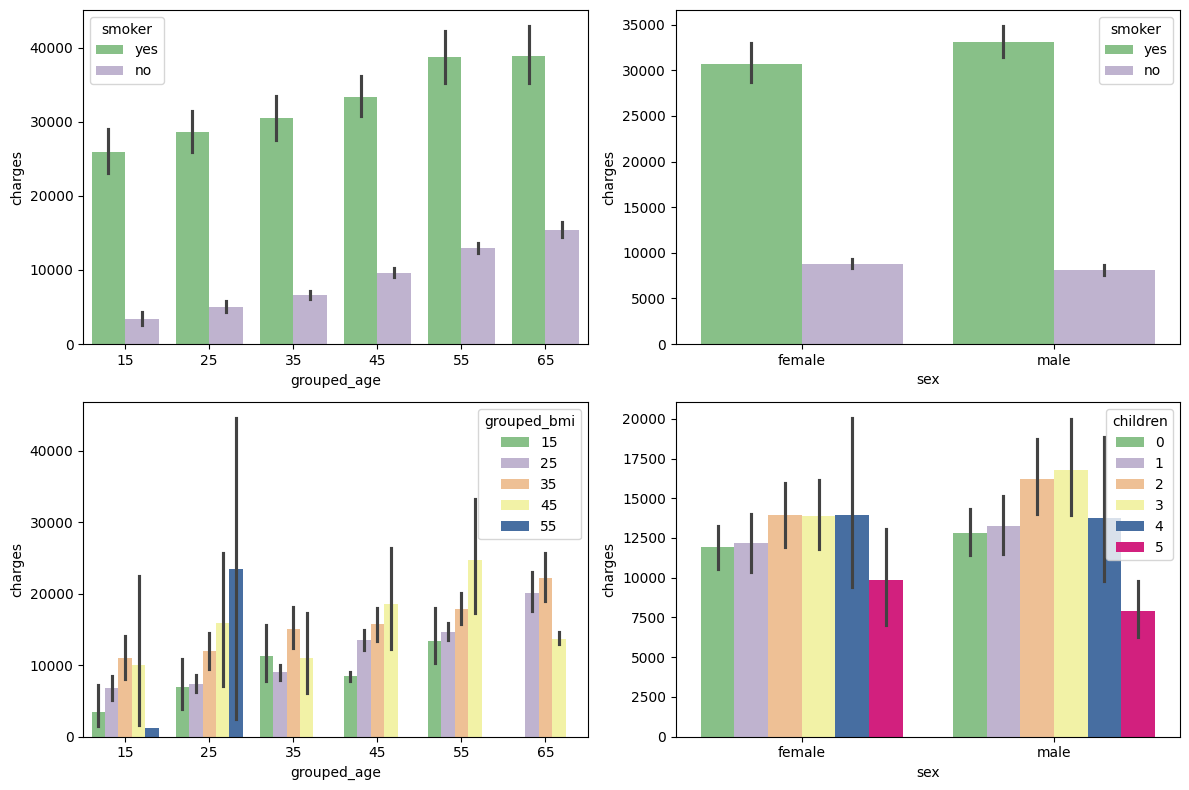

In [13]:
# Group both age and bmi to obtain readble graphs

agg_total_data = total_data.copy()
agg_total_data['grouped_age'] = agg_total_data['age'].apply(range_value)
agg_total_data['grouped_bmi'] = agg_total_data['bmi'].apply(range_value)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.barplot(x='grouped_age', y='charges', hue='smoker', data=agg_total_data, palette='Accent',ax=axes[0,0],)
sns.barplot(x='sex', y='charges', hue='smoker', data=agg_total_data, palette='Accent',ax=axes[0,1])
sns.barplot(x='grouped_age', y='charges', hue='grouped_bmi', data=agg_total_data, palette='Accent',ax=axes[1,0])
sns.barplot(x='sex', y='charges', hue='children', data=agg_total_data, palette='Accent',ax=axes[1,1])

# Adjust Layout
plt.tight_layout()

# Plot the Data
plt.show()


Conclusions:
- The charges increases as older is the person and for smokers.
- There are more male smokers than female.
- The bmi increases in many cases as older is the person.
- There is no penalization for having children based on gender.

In [14]:
# We will copy the dataset to factorize the categorical variables in a new one:

fact_data = total_data.copy()
fact_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
fact_data["sex"] = pd.factorize(fact_data["sex"])[0]
fact_data["smoker"] = pd.factorize(fact_data["smoker"])[0]
fact_data["region"] = pd.factorize(fact_data["region"])[0]

fact_data.head

<bound method NDFrame.head of       age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       0       0  16884.92400
1      18    1  33.770         1       1       1   1725.55230
2      28    1  33.000         3       1       1   4449.46200
3      33    1  22.705         0       1       2  21984.47061
4      32    1  28.880         0       1       2   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       1       2  10600.54830
1334   18    0  31.920         0       1       3   2205.98080
1335   18    0  36.850         0       1       1   1629.83350
1336   21    0  25.800         0       1       0   2007.94500
1337   61    0  29.070         0       0       2  29141.36030

[1338 rows x 7 columns]>

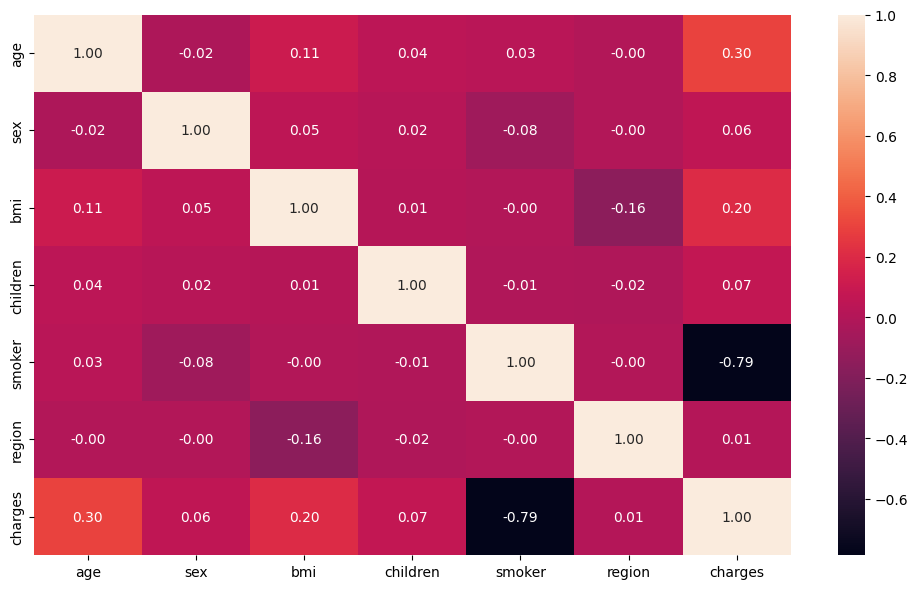

In [16]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(fact_data.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Conclusions: 

- From the graph we  can conclude that our target variable has significant correlations with smoker, age and bmi.
- Charges are higher for smokers than for non-smokers. That is the most important correlation.
- Charges rise with age.
- Charges rise with bmi.


In [17]:
# Outlier Analysis:

fact_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


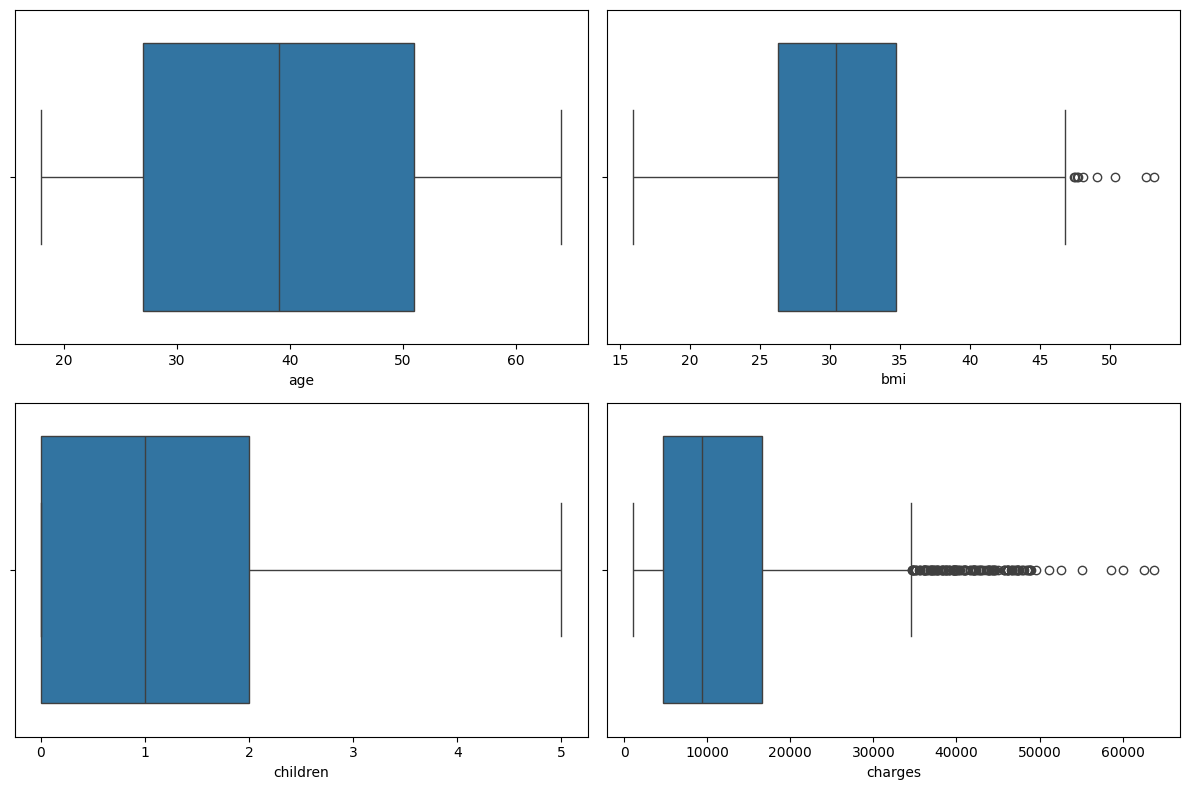

In [18]:
# Boxplots to Observe Outliers 

fig, axis = plt.subplots(2, 2, figsize=(12,8))

sns.boxplot(ax=axis[0,0], data=fact_data, x = 'age')
sns.boxplot(ax=axis[0,1], data=fact_data, x = 'bmi')
sns.boxplot(ax=axis[1,0], data=fact_data, x = 'children')
sns.boxplot(ax=axis[1,1], data=fact_data, x = 'charges')

plt.tight_layout()

plt.show()

In [19]:
# Creating the variable for no outliers

fact_data_no_outliers = fact_data.copy()

In [20]:
# BMI Analysis

bmi_stats = fact_data['bmi'].describe()
print(bmi_stats)

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


In [21]:
# BMI IQR

bmi_iqr = bmi_stats['75%'] - bmi_stats['25%']
upper_limit = bmi_stats['75%'] + 1.5 * bmi_iqr
lower_limit = bmi_stats['25%'] - 1.5 * bmi_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")

The upper and lower limits for finding outliers are 47.29 and 13.7, with an interquartile range of 8.4


In [22]:
# Trimm the Outliers 

bmi_outliers = fact_data[fact_data['bmi'] > 47.29].shape
print(bmi_outliers)


(9, 7)


In [23]:
rows_trimm = fact_data_no_outliers[fact_data_no_outliers['bmi'] > 47.29].index

fact_data_no_outliers.drop(rows_trimm, axis=0, inplace=True)
fact_data_no_outliers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [24]:
fact_data_no_outliers.reset_index(drop=True, inplace=True)

In [25]:
# Looking for null values
fact_data_no_outliers.isnull().sum()
fact_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
# Saving data

fact_data.to_csv("/workspaces/machine-learning-linear-regression-Juli-MM/data/processed/fact_data.csv", index = False)
fact_data_no_outliers.to_csv("/workspaces/machine-learning-linear-regression-Juli-MM/data/processed/fact_data_no_outliers.csv", index = False)

In [27]:
# Featuring Scaling

# Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

num_variables = ["age", "bmi", "children", "sex", "smoker", "region"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(fact_data[num_variables])
fact_data_scal = pd.DataFrame(scal_features, index = fact_data.index, columns = num_variables)
fact_data_scal['charges'] = fact_data['charges']
fact_data_scal.head()

,age,bmi,children,sex,smoker,region,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,16884.92400
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,1725.55230
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,4449.46200
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,21984.47061
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,3866.85520


In [28]:
# Feature selection

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples

X = fact_data_scal.drop("charges", axis = 1)
y = fact_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# KBest Selection for the best Features

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,children,smoker
0,0.608696,0.107345,0.4,1.0
1,0.630435,0.224913,0.0,1.0
2,0.739130,0.239440,0.0,1.0
3,0.456522,0.493947,1.0,1.0
4,0.782609,0.148238,0.6,1.0


In [29]:
X_train_sel['charges'] = list(y_train)
X_test_sel['charges'] = list(y_test)
X_train_sel.to_csv('/workspaces/machine-learning-linear-regression-Juli-MM/data/processed/clean_train-insurance.csv', index=False)
X_test_sel.to_csv('/workspaces/machine-learning-linear-regression-Juli-MM/data/processed/clean_test-insurance.csv', index=False)

### Linear Regression Model

In [30]:
# Import cleanned data

train_data = pd.read_csv('/workspaces/machine-learning-linear-regression-Juli-MM/data/processed/clean_train-insurance.csv')
test_data = pd.read_csv('/workspaces/machine-learning-linear-regression-Juli-MM/data/processed/clean_test-insurance.csv')

train_data.head()

,age,bmi,children,smoker,charges
0,0.608696,0.107345,0.4,1.0,9193.83850
1,0.630435,0.224913,0.0,1.0,8534.67180
2,0.739130,0.239440,0.0,1.0,27117.99378
3,0.456522,0.493947,1.0,1.0,8596.82780
4,0.782609,0.148238,0.6,1.0,12475.35130


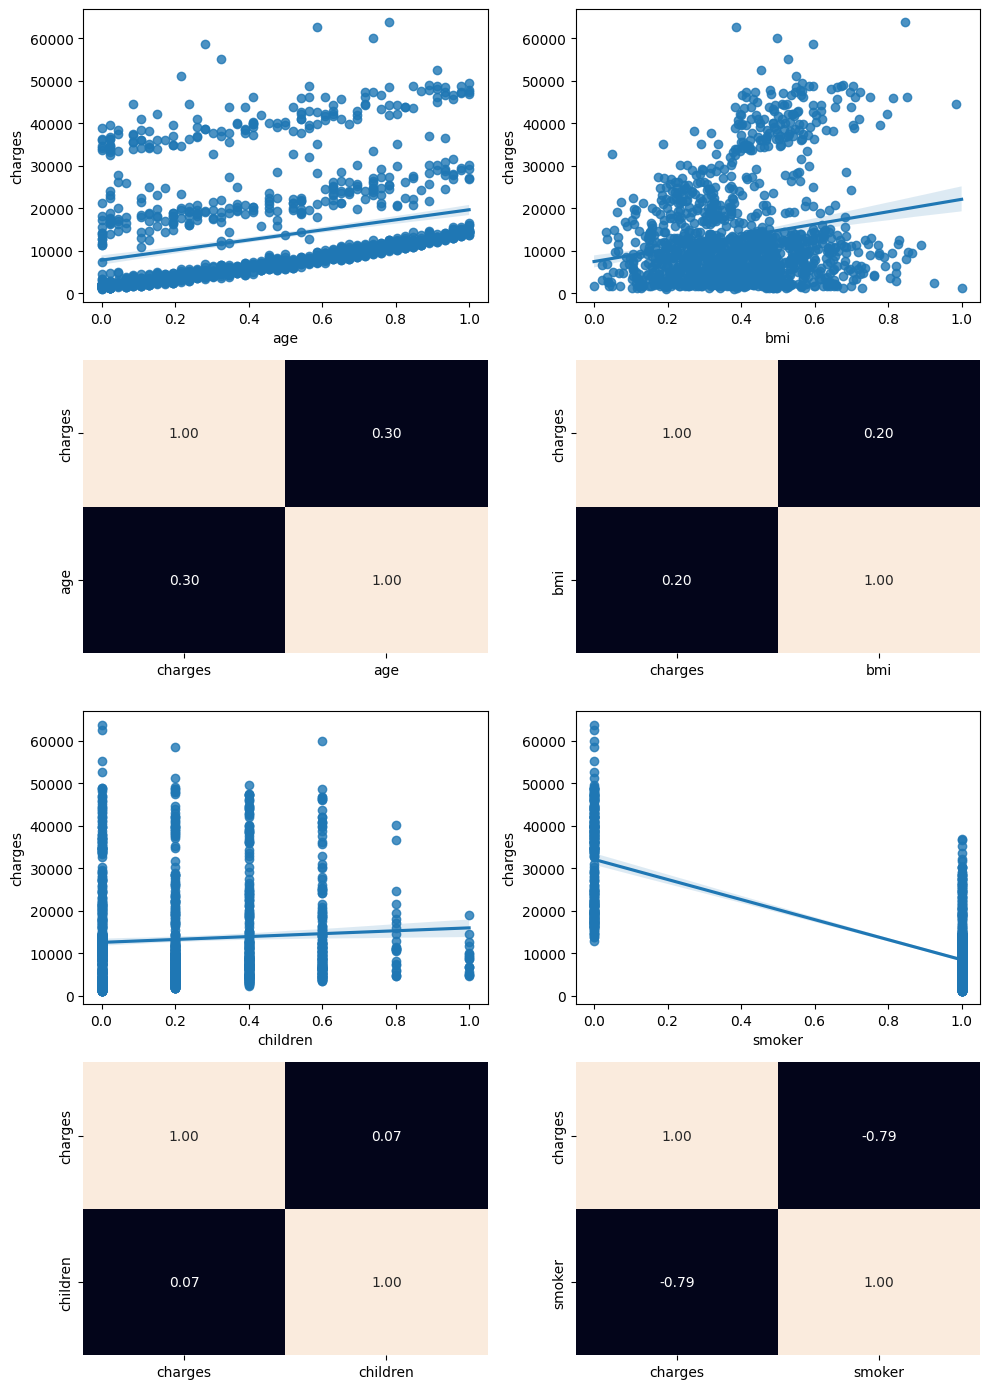

In [31]:
# Regplot y Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [32]:
# Train the model

X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Parameter Fitting

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercept (a): 21390.678607575144
Coefficients (b1, b2): [ 11825.27326582  12174.01619773   2135.99985473 -23653.21164629]


In [35]:
# Model Prediction

y_pred = model.predict(X_test)

In [36]:
# Test The Model Accuracy

from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 33981653.95019776
Coefficient of determination: 0.7811147722517886


A Linear Regression model does not have hyperparameters to optimize. We must use another model to perform improvements like a regularized model.

In [51]:
# Apply Lasso Model

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 0.01, max_iter = 300)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

In [52]:
# Test The Model Accuracy

from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 33981674.95391997
Coefficient of determination: 0.7811146369610071


Conclusions:

- Lasso Model did not optimize our linear regression. It's essential to explore different hyperparameter configurations, improve feature engineering, address data quality issues, and consider alternative modeling approaches to potentially enhance the model's performance. Additionally, a deeper understanding of the dataset and the problem domain can provide valuable insights for improving model performance.

- age - numerical
- sex - categorical
- bmi - numerical
- children - numerical
- smoker - categorical
- region - categorical
- charges --> target - numerical